In [0]:
spark

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, sum, avg, row_number, aggregate, when, year, month, dayofmonth, lower, regexp_replace, current_date, expr
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('ipl-de-project').getOrCreate()

In [0]:
# Define AWS access keys
access_key = "accesskey"
secret_key = "secretkey"


# Set Spark configuration to use the AWS keys
spark.conf.set("fs.s3a.access.key", access_key)
spark.conf.set("fs.s3a.secret.key", secret_key)

# Mount the S3 bucket to a directory under /mnt
dbutils.fs.mount(
  source = "s3a://ipl-dataanalysis-de-projectbuc",
  mount_point = "/mnt/ipl-dataanalysis-de-projectbuc",
  extra_configs = {"fs.s3a.access.key": access_key, "fs.s3a.secret.key": secret_key}
)



---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-407874016907655>, line 11
      8 spark.conf.set("fs.s3a.secret.key", secret_key)
     10 # Mount the S3 bucket to a directory under /mnt
---> 11 dbutils.fs.mount(
     12   source = "s3a://ipl-dataanalysis-de-projectbuc",
     13   mount_point = "/mnt/ipl-dataanalysis-de-projectbuc",
     14   extra_configs = {"fs.s3a.access.key": access_key, "fs.s3a.secret.key": secret_key}
     15 )

File /databricks/python_shell/dbruntime/dbutils.py:378, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    376 exc.__context__ = None
    377 exc.__cause__ = None
--> 378 raise exc

ExecutionError: An error occurred while calling o1847.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/ipl-dataanalysis-de-projectbuc; 

In [0]:
# List files in the mounted directory to verify
display(dbutils.fs.ls("/mnt/ipl-dataanalysis-de-projectbuc"))


path,name,size,modificationTime
dbfs:/mnt/ipl-dataanalysis-de-projectbuc/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1718819814000
dbfs:/mnt/ipl-dataanalysis-de-projectbuc/Match.csv,Match.csv,113358,1718819836000
dbfs:/mnt/ipl-dataanalysis-de-projectbuc/Player.csv,Player.csv,34614,1718819838000
dbfs:/mnt/ipl-dataanalysis-de-projectbuc/Player_match.csv,Player_match.csv,2664692,1718819833000
dbfs:/mnt/ipl-dataanalysis-de-projectbuc/Team.csv,Team.csv,343,1718819834000


In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
ball_by_ball_df=spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-dataanalysis-de-projectbuc/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])


In [0]:
match_df=spark.read.schema(match_schema).format("csv").option("header", True).load("s3://ipl-dataanalysis-de-projectbuc/Match.csv")

match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab|

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])


In [0]:
player_df=spark.read.schema(player_schema).format("csv").option("header", True).load("s3://ipl-dataanalysis-de-projectbuc/Player.csv")

player_df.show()

+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|     SC Ganguly|NULL| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    BB McCullum|NULL|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|NULL|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|NULL|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|NULL|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       R Dravid|NULL|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       W Jaffer|NULL|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|        V Kohli|NULL|Right-hand bat|    Right-arm medium|  

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])


In [0]:
player_match_df=spark.read.schema(player_match_schema).format("csv").option("header", True).load("s3://ipl-dataanalysis-de-projectbuc/Player_match.csv")

player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|            

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])


In [0]:
teams_df=spark.read.schema(team_schema).format("csv").option("Header", True).load("s3://ipl-dataanalysis-de-projectbuc/Team.csv")

teams_df.show()

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
|      5|      6|    Delhi Daredevils|
|      6|      7|      Mumbai Indians|
|      7|      8|     Deccan Chargers|
|      8|      9|Kochi Tuskers Kerala|
|      9|     10|       Pune Warriors|
|     10|     11| Sunrisers Hyderabad|
|     11|     12|Rising Pune Super...|
|     12|     13|       Gujarat Lions|
+-------+-------+--------------------+



In [0]:
#filter excluding wide balls and no balls
ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

#aggregate: total and avg runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
    )

total_and_avg_runs.show()

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|      average_runs|
+--------+----------+----------+------------------+
|  336009|         1|       151|1.2583333333333333|
|  501203|         1|       150|              1.25|
|  598022|         4|        11|1.8333333333333333|
|  829828|         1|       196|1.6333333333333333|
|  729308|         2|       135|1.1842105263157894|
|  829794|         2|       157| 1.353448275862069|
|  335993|         1|       131|1.0916666666666666|
|  501211|         2|       192|1.6695652173913043|
|  419133|         2|       149|1.2416666666666667|
|  548327|         2|       151|1.3017241379310345|
| 1082617|         1|       123|1.0512820512820513|
|  548367|         2|       134|1.1166666666666667|
|  419138|         2|       144|1.2743362831858407|
|  392191|         2|        75|1.3392857142857142|
| 1082601|         2|       160|1.6161616161616161|
| 1082650|         1|       121|1.0083333333333333|
|  392216|  

In [0]:
#windows function: running total of runs for each over
windowSpec=Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df=ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_s

In [0]:
# conditional column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df=ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs")>6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
#Extracting year, month, and day from the match date
match_df=match_df.withColumn("year", year("match_date"))
match_df=match_df.withColumn("month", month("match_date"))
match_df=match_df.withColumn("day", dayofmonth("match_date"))

#high margin win: categorizing win margins into 'high', 'medium',  and 'low'
match_df=match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

#analyze the impact of toss: who wns the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

#handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

#categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"), "Left-Handed").otherwise("Right-Handed")
)

player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|NULL| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2|bb mccullum|NULL|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:

# Add a 'veteran-status' column based on player age
player_match_df = player_match_df.withColumn(
     "veteran_status",
     when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
 )


#dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show()


+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
teams_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsman_per_season = spark.sql("""
SELECT
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m
ON b.match_id = m.match_id
JOIN player_match pm
ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsman_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     SE Marsh|       2008|       614|
|    G Gambhir|       2008|       532|
|ST Jayasuriya|       2008|       508|
|    SR Watson|       2008|       463|
|     GC Smith|       2008|       437|
| AC Gilchrist|       2008|       431|
|    YK Pathan|       2008|       430|
|     SK Raina|       2008|       420|
|     MS Dhoni|       2008|       414|
|     V Sehwag|       2008|       399|
|    RG Sharma|       2008|       399|
|     R Dravid|       2008|       370|
|   SC Ganguly|       2008|       349|
|     S Dhawan|       2008|       340|
|KC Sangakkara|       2008|       319|
|    DJ Hussey|       2008|       318|
|   RV Uthappa|       2008|       316|
|  SA Asnodkar|       2008|       311|
| Yuvraj Singh|       2008|       299|
|     PA Patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
P.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <=6
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC                           
""")

economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|SMSM Senanayake|0.8492063492063492|            0|
|      SP Narine| 0.929718875502008|            0|
|     GD McGrath|0.9324324324324325|            0|
|     SL Malinga|0.9407630522088354|            0|
|  Sohail Tanvir| 0.946969696969697|            0|
|     A Chandila|0.9513888888888888|            0|
|      DP Nannes|0.9532163742690059|            0|
|        B Kumar|0.9561487130600572|            0|
|  BW Hilfenhaus|            0.9625|            0|
|      R Rampaul|0.9629629629629629|            0|
|       DW Steyn|0.9700374531835206|            0|
|       R Ashwin|0.9729344729344729|            0|
|     SM Pollock|1.0049019607843137|            0|
|   Ankit Sharma|1.0072463768115942|            0|
|      RJ Harris|1.0093896713615023|            0|
|     WPUJC Vaas|1.0151515151515151|            0|
|      AC Thomas|1.027777777777

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner, CASE WHEN m.toss_winner = m.match_winner THEN 'Won' Else 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id                                      
""")

toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   Rashid Khan|               6.0|             1|
| Shahid Afridi|3.3333333333333335|             6|
|      AN Ahmed|               3.0|             3|
|      BA Bhatt|               3.0|             2|
|       SN Khan|2.5789473684210527|            19|
|    SP Jackson|               2.4|             5|
| Harmeet Singh|2.3333333333333335|             6|
|      Umar Gul|2.3076923076923075|            13|
|    SM Pollock|               2.2|            15|
|       MS Gony|2.1379310344827585|            29|
| Shivam Sharma|               2.0|             2|
|      RS Sodhi|               2.0|             2|
|       PR Shah|               2.0|             4|
|     VRV Singh|               2.0|             2|
|MJ McClenaghan|               2.0|            11|
|   DS Kulkarni|               2.0|             3|
| CR Brathwaite|1.9642857142857

In [0]:
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

team_toss_win_performance.show()

+--------------------+--------------+---------------+
|               team1|matches_played|wins_after_toss|
+--------------------+--------------+---------------+
| Chennai Super Kings|            37|             27|
|      Mumbai Indians|            42|             26|
|Kolkata Knight Ri...|            36|             24|
|Royal Challengers...|            34|             19|
|    Delhi Daredevils|            36|             17|
|    Rajasthan Royals|            25|             16|
|     Kings XI Punjab|            32|             14|
| Sunrisers Hyderabad|            16|              8|
|     Deccan Chargers|            22|              6|
|Rising Pune Super...|             6|              4|
|       Gujarat Lions|             7|              3|
|Kochi Tuskers Kerala|             4|              2|
|       Pune Warriors|            10|              2|
+--------------------+--------------+---------------+



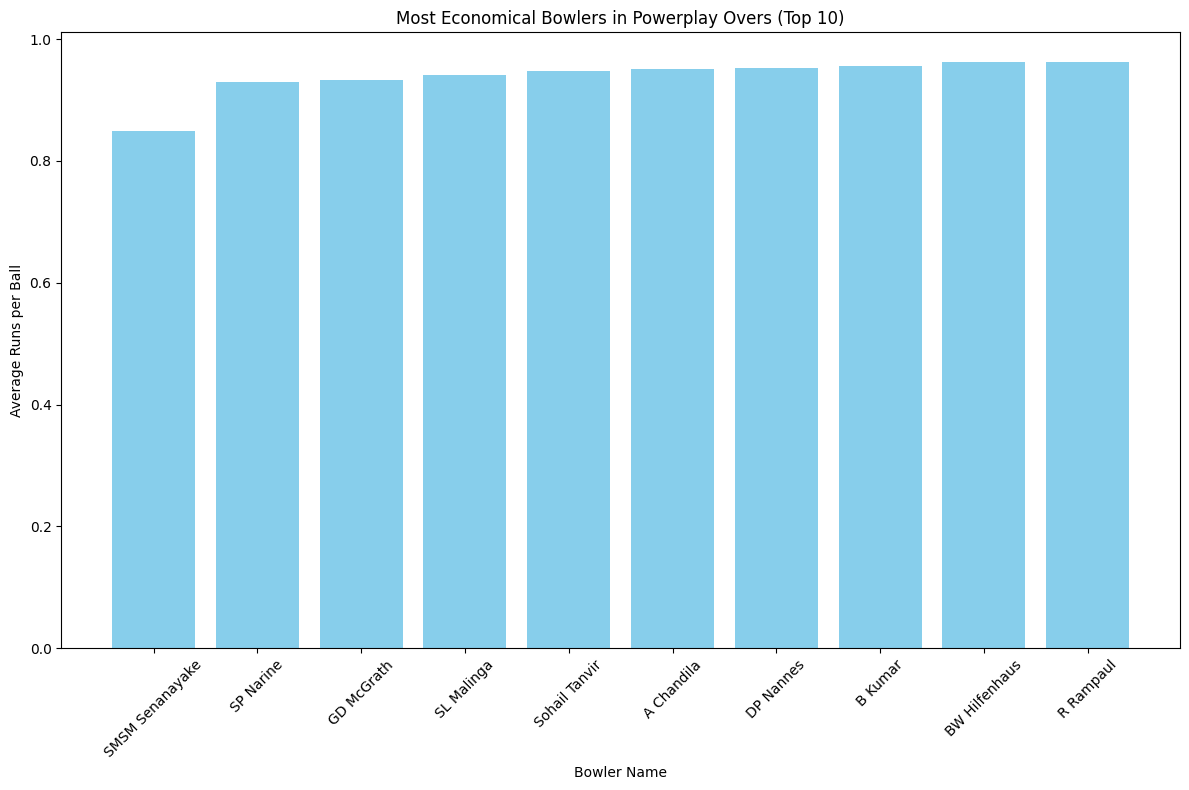

In [0]:
import matplotlib.pyplot as plt

economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

plt.figure(figsize=(12, 8))
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

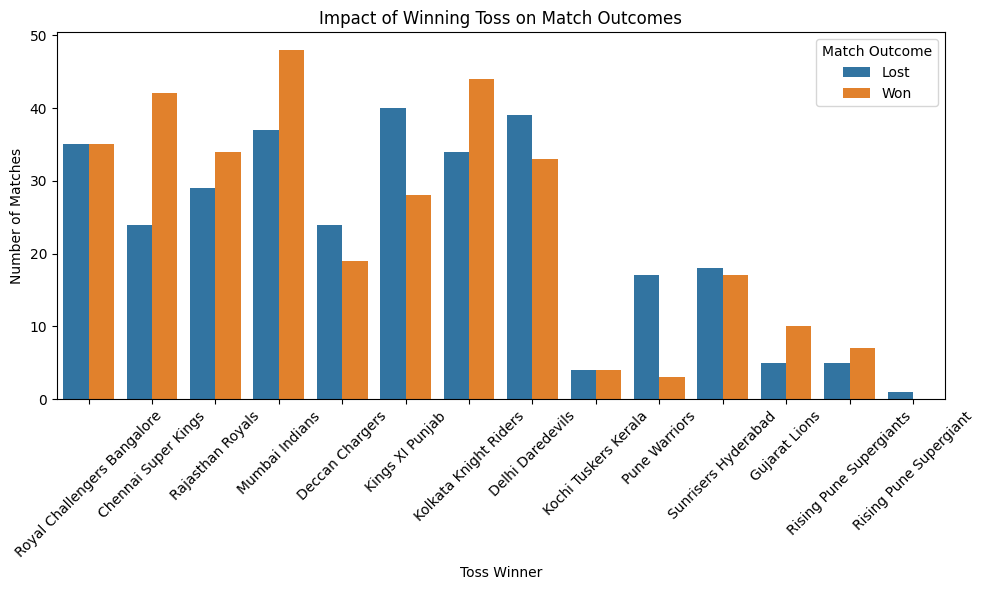

In [0]:
import seaborn as sns
     
toss_impact_pd = toss_impact_individual_matches.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

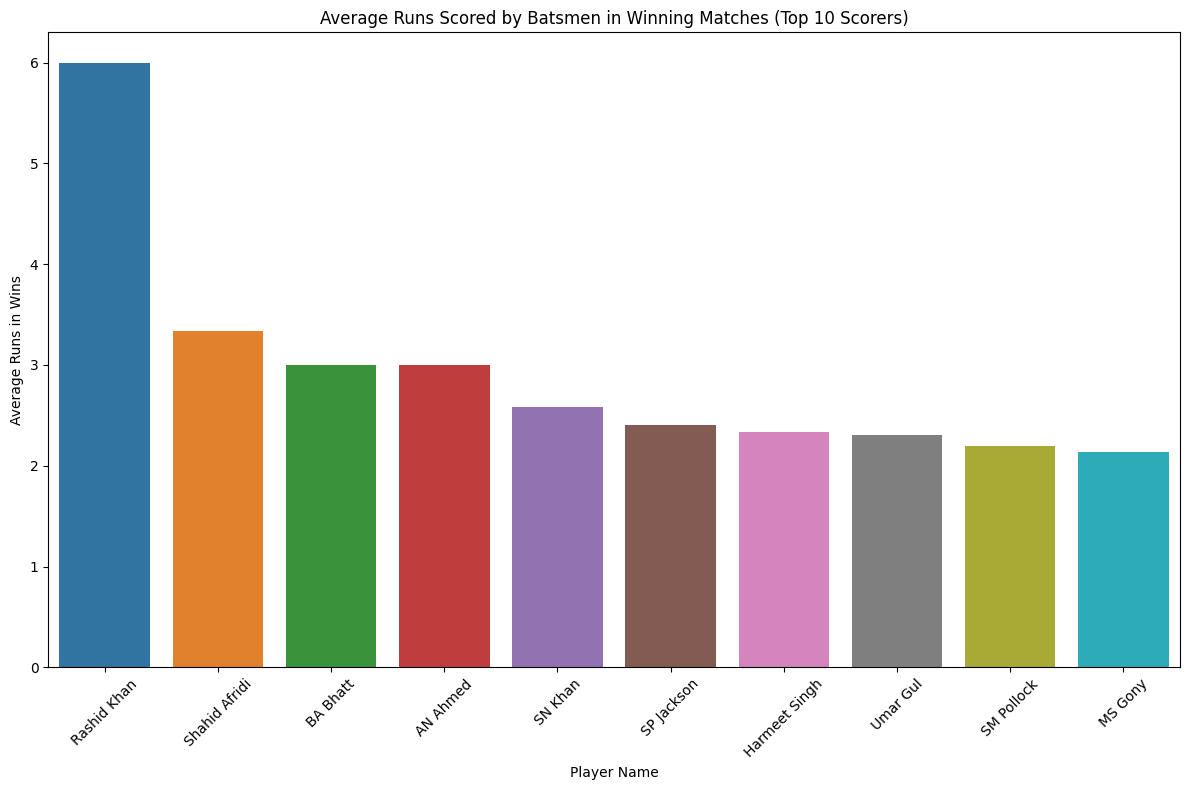

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

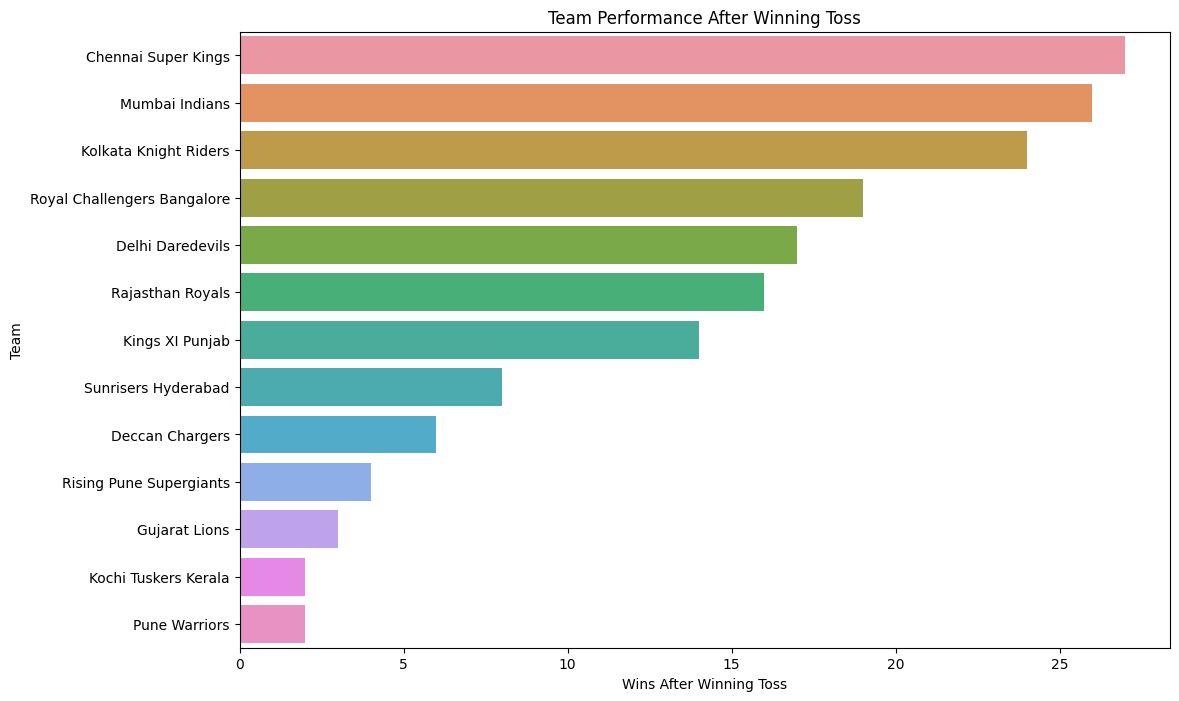

In [0]:
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()